# ESRI Shape File to GeoJSON Conversion Example

## CLUM Regions

In [1]:
import os
import time

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas as gpd

### Load ESRI Shape file

In [2]:
georegions = gpd.read_file('../datasets/CLUM/CLUM_Commodities_2020.shp')
georegions = georegions.to_crs('EPSG:3577') ### EPSG:3577: GDA94 / Australian Albers projection

### List Regions in ShapeFile

In [3]:
print("Shape:", georegions.shape)
georegions.head(5)

Shape: (146878, 9)


,Commod_dsc,Broad_type,Source_yr,State,Area_ha,Lucodev8n,Tertiary,date,geometry
0,chickens,Animals,2015,ACT,5.234930,523,5.2.3 Poultry farms,2012,"POLYGON ((1538982.303 -3947258.905, 1538967.27..."
1,olives,Fruits,2015,ACT,25.311300,442,4.4.2 Irrigated olives,2012,"POLYGON ((1551820.086 -3964654.231, 1551827.97..."
2,olives,Fruits,2015,ACT,0.973185,442,4.4.2 Irrigated olives,2012,"POLYGON ((1554509.456 -3961489.157, 1554528.31..."
3,grapes wine,Fruits,2015,ACT,15.969200,444,4.4.4 Irrigated vine fruits,2012,"POLYGON ((1557072.839 -3952311.159, 1557127.73..."
4,truffles,Vegetables and herbs,2015,ACT,10.858800,440,4.4.0 Irrigated perennial horticulture,2012,"POLYGON ((1557072.839 -3952311.159, 1557099.15..."


In [4]:
# Display sorted list of Commodity descriptions
print('# of Commodities : ',georegions['Commod_dsc'].nunique())
commodities = pd.DataFrame(np.sort(np.array(georegions['Commod_dsc'].unique())))
commodities.head(5)

# of Commodities :  217


,0
0,algae
1,alkaloid poppies
2,almonds
3,alpacas
4,apples


In [5]:
# Display sorted list of Broad types
print('# of Broad Type : ',georegions['Broad_type'].nunique())
broad_types = pd.DataFrame(np.sort(np.array(georegions['Broad_type'].unique())))
broad_types.head(12)

# of Broad Type :  12


,0
0,Animals
1,Cereals
2,Flowers and bulbs
3,Forest
4,Fruits
5,Mines
6,Nuts
7,Oilseeds
8,Other crops
9,Pasture


In [6]:
# Display sorted list of States
print('# of State : ',georegions['State'].nunique())
states = pd.DataFrame(np.sort(np.array(georegions['State'].unique())))
states.head(8)

# of State :  8


,0
0,ACT
1,NSW
2,NT
3,Qld
4,SA
5,Tas
6,Vic
7,WA


In [7]:
# Display sorted list of Land Use Codes and Descriptions
print('# of LU Code v8n : ',georegions['Lucodev8n'].nunique())
print('# of Tertiary Description : ',georegions['Tertiary'].nunique())
lucodes = pd.DataFrame(georegions[['Lucodev8n','Tertiary']].drop_duplicates().sort_values(by='Tertiary'))
lucodes = lucodes.set_index('Lucodev8n')
lucodes.head(20)

# of LU Code v8n :  123
# of Tertiary Description :  123


,Tertiary
Lucodev8n,
117,1.1.7 Other conserved area
130,1.3.0 Other minimal use
133,1.3.3 Residual native cover
134,1.3.4 Rehabilitation
210,2.1.0 Grazing native vegetation
220,2.2.0 Production native forests
221,2.2.1 Wood production forestry
310,3.1.0 Plantation forests
311,3.1.1 Hardwood plantation forestry


In [8]:
# Display number of different categories
print('# of Source Year : ',georegions['Source_yr'].nunique())
print('# of Published Year : ',georegions['date'].nunique())

years = pd.DataFrame(georegions[['date','Source_yr']].drop_duplicates().sort_values(by=['date','Source_yr'],ascending = True))
years = years.reset_index(drop=True)
years[years['date']==2019]

# of Source Year :  18
# of Published Year :  9


,date,Source_yr
39,2019,2002
40,2019,2003
41,2019,2004
42,2019,2005
43,2019,2007
44,2019,2008
45,2019,2009
46,2019,2010
47,2019,2011
48,2019,2012


### Subset file to only include Wheat growing areas

In [9]:
georegions_wheat = georegions[georegions['Commod_dsc']=='wheat']
georegions_wheat.shape
georegions_wheat.head(10)

,Commod_dsc,Broad_type,Source_yr,State,Area_ha,Lucodev8n,Tertiary,date,geometry
1372,wheat,Cereals,2016,WA,0.557618,431,4.3.1 Irrigated cereals,2016,"POLYGON ((-1819386.215 -2816833.698, -1819433...."
105369,wheat,Cereals,2016,SA,1.849590,311,3.1.1 Hardwood plantation forestry,2016,"POLYGON ((600585.380 -3805057.715, 600556.241 ..."
106512,wheat,Cereals,2016,SA,20.273600,320,3.2.0 Grazing modified pastures,2016,"POLYGON ((628927.360 -3777430.341, 628835.120 ..."
107382,wheat,Cereals,2016,SA,9.903850,324,3.2.4 Pasture legume/grass mixtures,2016,"POLYGON ((593109.455 -3789663.415, 592949.243 ..."
107770,wheat,Cereals,2016,SA,8.009860,325,3.2.5 Sown grasses,2016,"POLYGON ((606673.829 -3795644.879, 606667.862 ..."
107826,wheat,Cereals,2016,SA,109.140000,330,3.3.0 Cropping,2016,"POLYGON ((598962.178 -3775247.655, 598949.239 ..."
107827,wheat,Cereals,2016,SA,87.025600,330,3.3.0 Cropping,2016,"POLYGON ((599134.187 -3774065.733, 598872.265 ..."
107828,wheat,Cereals,2016,SA,40.578700,330,3.3.0 Cropping,2016,"POLYGON ((597518.280 -3767657.613, 597969.046 ..."
107829,wheat,Cereals,2016,SA,10.146000,330,3.3.0 Cropping,2016,"POLYGON ((595983.179 -3766021.814, 595966.340 ..."
107830,wheat,Cereals,2016,SA,59.181500,330,3.3.0 Cropping,2016,"POLYGON ((581338.040 -3765507.532, 581402.929 ..."


In [10]:
georegions_wheat.to_file("../datasets/CLUM/CLUM_Commodities_2020_Wheat.json", driver="GeoJSON")

### Subset file to include all cereal crop growing areas

In [11]:
georegions_cereals = georegions[georegions['Broad_type']=='Cereals']
georegions_cereals.shape
georegions_cereals.head(10)

,Commod_dsc,Broad_type,Source_yr,State,Area_ha,Lucodev8n,Tertiary,date,geometry
1372,wheat,Cereals,2016,WA,0.557618,431,4.3.1 Irrigated cereals,2016,"POLYGON ((-1819386.215 -2816833.698, -1819433...."
1417,rice,Cereals,2016,WA,15.751000,439,4.3.9 Irrigated rice,2016,"POLYGON ((-812704.895 -1950556.254, -812687.08..."
1418,rice,Cereals,2016,WA,0.000425,439,4.3.9 Irrigated rice,2016,"POLYGON ((-818744.750 -1949671.929, -818748.67..."
1419,rice,Cereals,2016,WA,316.339000,439,4.3.9 Irrigated rice,2016,"POLYGON ((-814320.143 -1949898.595, -814853.60..."
1420,rice,Cereals,2016,WA,1730.290000,439,4.3.9 Irrigated rice,2016,"POLYGON ((-819172.875 -1948828.929, -819170.34..."
57669,maize,Cereals,2017,Vic,0.385847,431,4.3.1 Irrigated cereals,2016,"POLYGON ((1059956.578 -3916980.949, 1059790.42..."
57670,maize,Cereals,2017,Vic,6.605400,431,4.3.1 Irrigated cereals,2016,"POLYGON ((1058383.872 -3917531.737, 1058232.22..."
57674,maize,Cereals,2017,Vic,6.863170,431,4.3.1 Irrigated cereals,2016,"POLYGON ((1060247.904 -3918504.720, 1060354.86..."
57754,maize,Cereals,2017,Vic,6.552960,431,4.3.1 Irrigated cereals,2016,"POLYGON ((968603.686 -3839391.130, 968331.967 ..."
57755,maize,Cereals,2017,Vic,6.344010,431,4.3.1 Irrigated cereals,2016,"POLYGON ((968556.065 -3839894.223, 968283.429 ..."


In [12]:
georegions_cereals.to_file("../datasets/CLUM/CLUM_Commodities_2020_Cereals.json", driver="GeoJSON")

## Plot all land use areas on a map

<AxesSubplot:>

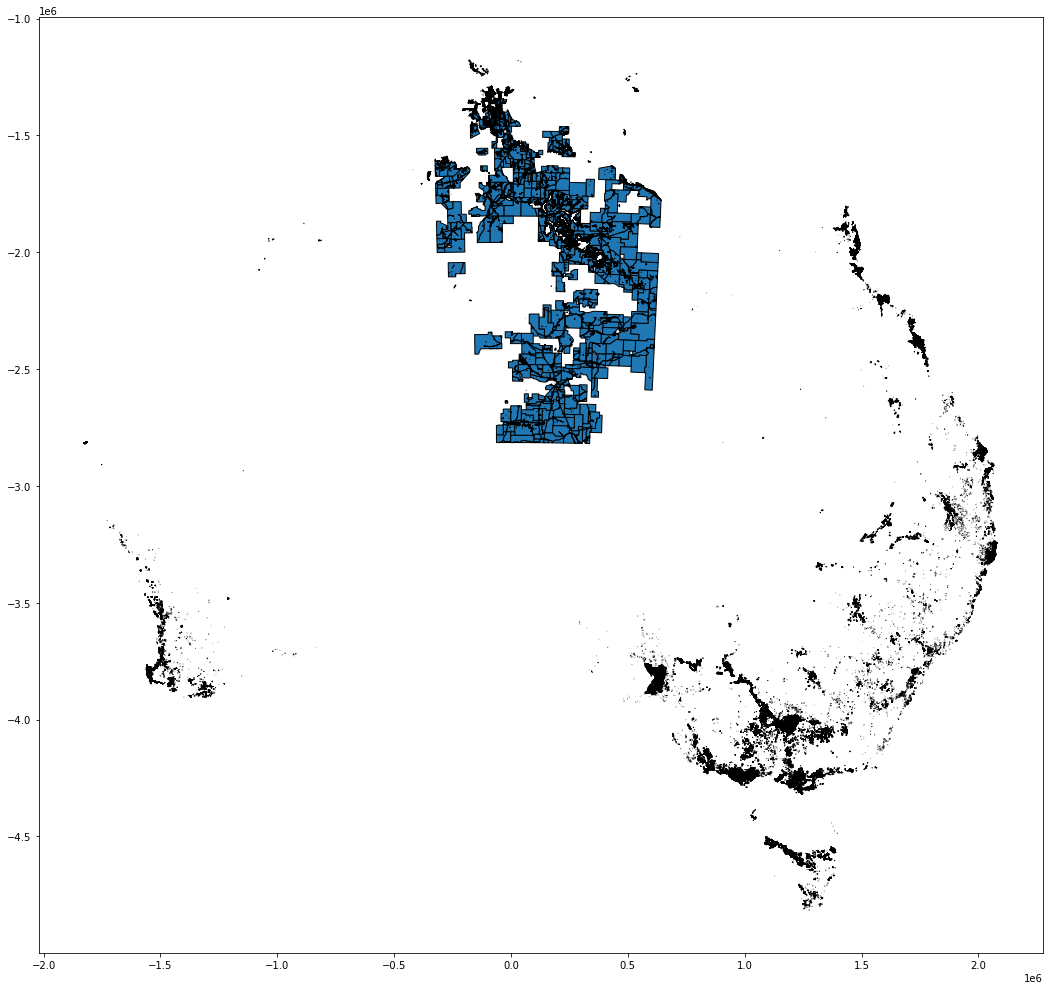

In [13]:
georegions.plot(column="Broad_type", figsize=(18,18), edgecolor="black")

### Plot just Wheat growing areas against ABARE Regions

<AxesSubplot:>

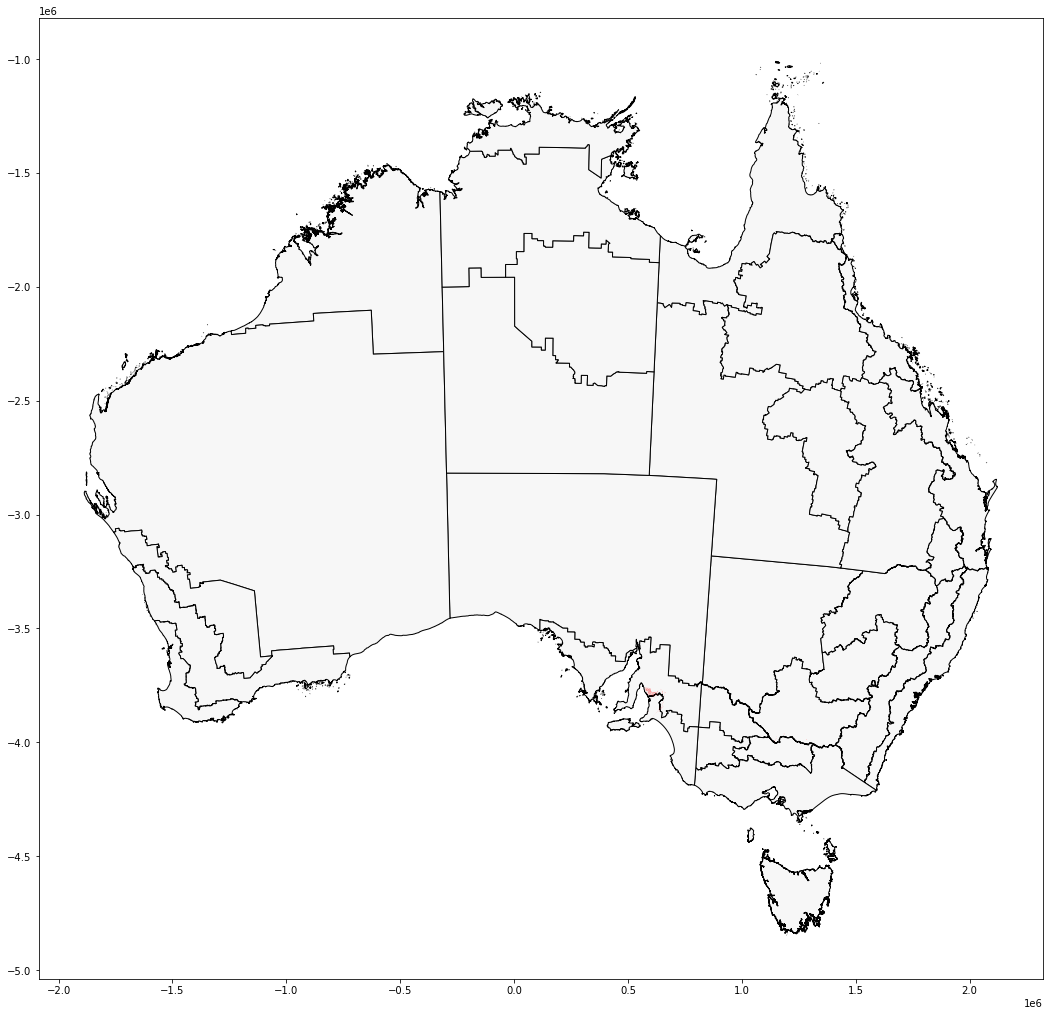

In [14]:
# Load ABARES Regions
georegions_abares = gpd.read_file('../datasets/aagis/aagis_asgs16v1_g5a.shp')
georegions_abares = georegions_abares.to_crs('EPSG:3577') ### EPSG:3577: GDA94 / Australian Albers projection

# Create ABARES Region layer
abares_layer = georegions_abares.plot(figsize=(18,18), color='#F7F7F7', edgecolor='black')

# Plot Wheat growing area over ABARES regions
georegions_wheat.plot(ax=abares_layer, color='red')

In [21]:
georegions_cereals.explore(column="Commod_dsc", # make choropleth based on Commodity description
     tooltip="Commod_dsc", popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") ) # use black outline